In [79]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [80]:
# load & prepare products info
item_features = pd.read_csv('product.csv')
item_features.columns = item_features.columns.str.lower()
item_features.rename(columns={'product_id': 'item_id'}, inplace=True)

# load & prepare users info
user_features = pd.read_csv('hh_demographic.csv')
user_features.columns = user_features.columns.str.lower()
user_features.rename(columns={'household_key': 'user_id'}, inplace=True)

## used functions

In [81]:
def describe_feature(ft: pd.Series, **kwargs):
    nunique = ft.nunique()
    plt.figure(figsize=kwargs.get('figsize', (10, 4)))
    step = (nunique - 1) / nunique
    # plt.xticks(np.arange(kwargs.get('start', 0.5), nunique - 1, step))
    plt.xticks(np.arange(step / 2, nunique - 1, step))
    plt.hist(ft, bins=kwargs.get('bins', nunique) , edgecolor='black')

## item features EDA

In [82]:
item_features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92353 entries, 0 to 92352
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   item_id               92353 non-null  int64 
 1   manufacturer          92353 non-null  int64 
 2   department            92353 non-null  object
 3   brand                 92353 non-null  object
 4   commodity_desc        92353 non-null  object
 5   sub_commodity_desc    92353 non-null  object
 6   curr_size_of_product  92353 non-null  object
dtypes: int64(2), object(5)
memory usage: 4.9+ MB


#### department

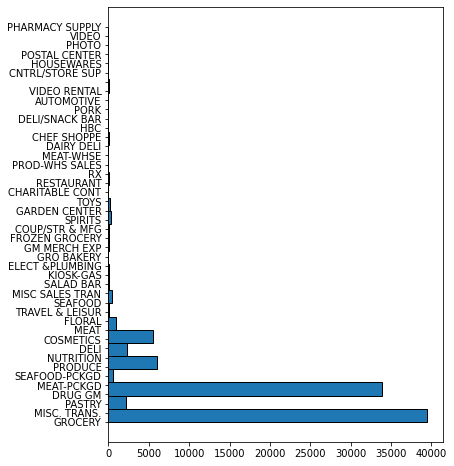

In [83]:
plt.figure(figsize=(6, 8))
plt.hist(item_features['department'], orientation='horizontal', edgecolor='black', bins=30);

In [84]:
item_features.groupby('department')['department'].count().sort_values(ascending=False)

department
GROCERY            39021
DRUG GM            31529
PRODUCE             3118
COSMETICS           3011
NUTRITION           2914
MEAT                2544
MEAT-PCKGD          2427
DELI                2354
PASTRY              2149
FLORAL               938
SEAFOOD-PCKGD        563
MISC. TRANS.         490
SPIRITS              377
SEAFOOD              369
GARDEN CENTER        128
RESTAURANT           102
MISC SALES TRAN       88
SALAD BAR             48
COUP/STR & MFG        39
TRAVEL & LEISUR       28
FROZEN GROCERY        23
KIOSK-GAS             16
                      15
CHEF SHOPPE           14
RX                     9
CNTRL/STORE SUP        4
GM MERCH EXP           3
POSTAL CENTER          3
TOYS                   3
DAIRY DELI             3
VIDEO RENTAL           3
PROD-WHS SALES         2
AUTOMOTIVE             2
PHOTO                  2
DELI/SNACK BAR         2
GRO BAKERY             2
CHARITABLE CONT        2
VIDEO                  2
PORK                   1
ELECT &PLUMBIN

#### brand

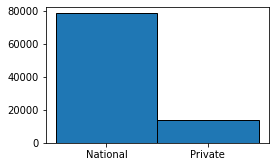

In [85]:
describe_feature(item_features['brand'], figsize=(4, 2.5))

#### commodity_desc

In [86]:
item_features['commodity_desc'].describe()

count                              92353
unique                               308
top       GREETING CARDS/WRAP/PARTY SPLY
freq                                2785
Name: commodity_desc, dtype: object

In [87]:
item_features.groupby('commodity_desc')['commodity_desc'].count().sort_values(ascending=False)

commodity_desc
GREETING CARDS/WRAP/PARTY SPLY    2785
CANDY - PACKAGED                  2475
MAKEUP AND TREATMENT              2467
HAIR CARE PRODUCTS                1744
SOFT DRINKS                       1704
                                  ... 
MISCELLANEOUS CROUTONS               1
PKG.SEAFOOD MISC                     1
FROZEN PACKAGE MEAT                  1
EASTER LILY                          1
MISCELLANEOUS(CORP USE ONLY)         1
Name: commodity_desc, Length: 308, dtype: int64

Здесь также у одной категории нет названия - вместо нее также пробел.

#### sub_commodity_desc

In [88]:
item_features['sub_commodity_desc'].describe()

count              92353
unique              2383
top       CARDS EVERYDAY
freq                1005
Name: sub_commodity_desc, dtype: object

In [89]:
item_features.groupby('sub_commodity_desc')['sub_commodity_desc'].count().sort_values(ascending=False)

sub_commodity_desc
CARDS EVERYDAY                 1005
BEERALEMALT LIQUORS             833
SPICES & SEASONINGS             629
GIFT-WRAP EVERYDAY              547
POTATO CHIPS                    531
                               ... 
GIFT SETS                         1
QSR FD: ORIENTAL (HOT)            1
QSR FD: ORIENTAL (COLD)           1
PUMPKINS NON FOOD DECORATED       1
DECORATIVE ROCK AND BARK          1
Name: sub_commodity_desc, Length: 2383, dtype: int64

In [90]:
(item_features['sub_commodity_desc'] == ' ').any()

True

И снова есть безымянные категории

#### curr_size_of_product

In [91]:
item_features['curr_size_of_product'].describe()

count     92353
unique     4345
top            
freq      30607
Name: curr_size_of_product, dtype: object

In [92]:
item_features.groupby('curr_size_of_product')['curr_size_of_product'].count().sort_values(ascending=False)

curr_size_of_product
              30607
16 OZ          3924
12 OZ          3473
8 OZ           2363
6 OZ           1697
              ...  
1500 CU IN        1
46 SQ FT          1
46-60 LB          1
150 OZ            1
XLRG              1
Name: curr_size_of_product, Length: 4345, dtype: int64

## user features EDA

In [94]:
user_features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 801 entries, 0 to 800
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   age_desc             801 non-null    object
 1   marital_status_code  801 non-null    object
 2   income_desc          801 non-null    object
 3   homeowner_desc       801 non-null    object
 4   hh_comp_desc         801 non-null    object
 5   household_size_desc  801 non-null    object
 6   kid_category_desc    801 non-null    object
 7   user_id              801 non-null    int64 
dtypes: int64(1), object(7)
memory usage: 50.2+ KB


#### age_desc

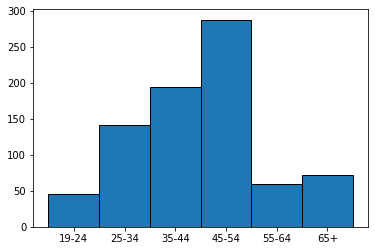

In [95]:
describe_feature(user_features['age_desc'].sort_values(), figsize=(6, 4))

#### marital_status_code

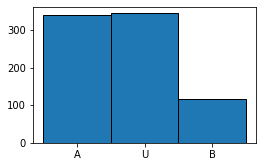

In [96]:
describe_feature(user_features['marital_status_code'], figsize=(4, 2.5))

In [100]:
user_features[['marital_status_code', 'hh_comp_desc']]

,marital_status_code,hh_comp_desc
0,A,2 Adults No Kids
1,A,2 Adults No Kids
2,U,2 Adults Kids
3,U,2 Adults Kids
4,B,Single Female
...,...,...
796,U,2 Adults No Kids
797,A,Unknown
798,U,Single Male
799,U,2 Adults No Kids


#### income_desc

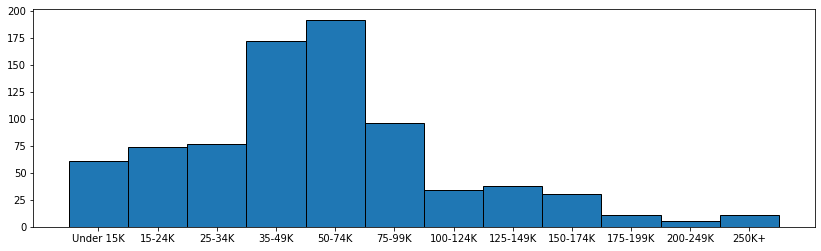

In [110]:
# распарсим поле для сортировки
uniq = user_features[['income_desc']].copy()
uniq['ext'] = user_features['income_desc'].str.extract(r'(\d+)K').astype('int')

describe_feature(uniq.sort_values(by='ext')['income_desc'], figsize=(14, 4))

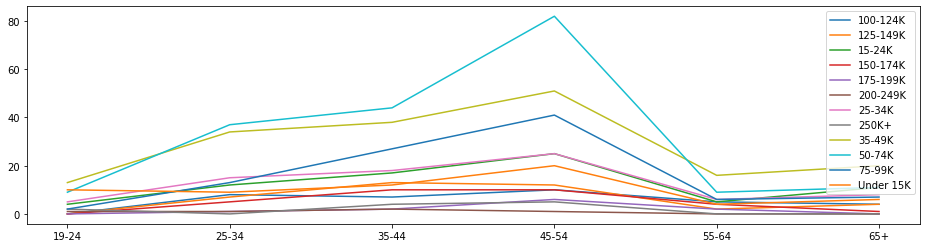

In [124]:
# распределение зарплат по возрастам
income_age = user_features.groupby('income_desc')['age_desc'].value_counts().unstack().fillna(0)
plt.figure(figsize=(16, 4))
plt.plot(income_age.T)
plt.legend(labels=income_age.index);

Основная масса покупателей с примерно средней з/п. Больше всех (по кол-ву) зарабатывающих среднюю з/п - в возрасте от 45 до 54.

#### homeowner_desc

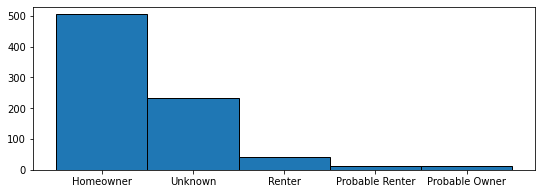

In [21]:
describe_feature(user_features['homeowner_desc'], figsize=(9, 3))

#### hh_comp_desc

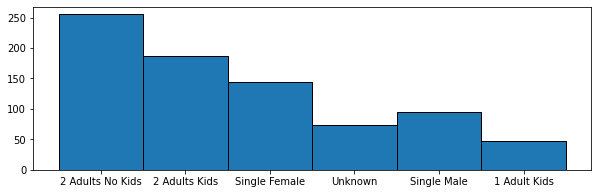

In [22]:
describe_feature(user_features['hh_comp_desc'], figsize=(10, 3))

#### household_size_desc

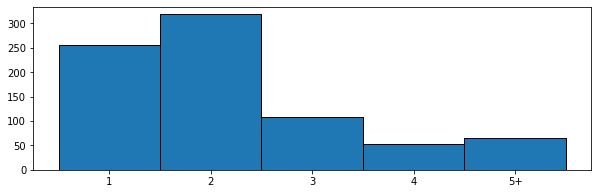

In [23]:
describe_feature(user_features['household_size_desc'].sort_values(), figsize=(10, 3))

Количество человек в семье. Тут нет пропусков и это хорошо.

#### kid_category_desc

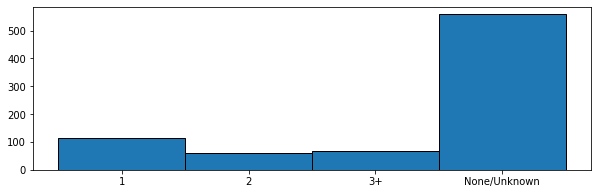

In [24]:
describe_feature(user_features['kid_category_desc'].sort_values(), figsize=(10, 3))

In [25]:
df = user_features[['hh_comp_desc', 'household_size_desc', 'kid_category_desc']].copy()
df.head(3)

,hh_comp_desc,household_size_desc,kid_category_desc
0,2 Adults No Kids,2,None/Unknown
1,2 Adults No Kids,2,None/Unknown
2,2 Adults Kids,3,1


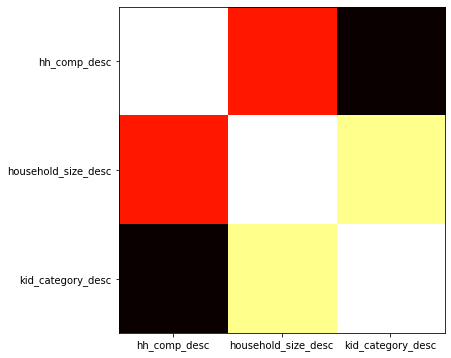

In [26]:
df['household_size_desc'] = df['household_size_desc'].str.extract(r'(\d+)').fillna(0)
df['hh_comp_desc'] = df['hh_comp_desc'].str.extract(r'(\d+)').fillna(0)
df['kid_category_desc'] = df['kid_category_desc'].str.extract(r'(\d+)').fillna(0)

plt.figure(figsize=(6, 6))
plt.imshow(df.astype('int').corr(), cmap='hot')
plt.xticks(ticks=np.arange(3), labels=df.columns)
plt.yticks(ticks=np.arange(3), labels=df.columns)
plt.show()

## состав семьи

In [27]:
# overview
user_features[['hh_comp_desc', 'household_size_desc', 'kid_category_desc']]

,hh_comp_desc,household_size_desc,kid_category_desc
0,2 Adults No Kids,2,None/Unknown
1,2 Adults No Kids,2,None/Unknown
2,2 Adults Kids,3,1
3,2 Adults Kids,4,2
4,Single Female,1,None/Unknown
...,...,...,...
796,2 Adults No Kids,2,None/Unknown
797,Unknown,3,1
798,Single Male,1,None/Unknown
799,2 Adults No Kids,2,None/Unknown


In [28]:
# парсим данные о составе семьи
df = user_features[['hh_comp_desc', 'household_size_desc', 'kid_category_desc']].copy()
df['household_size_desc'] = df['household_size_desc'].str.extract(r'(\d+)').fillna(0).astype('int')
df['hh_comp_desc'] = df['hh_comp_desc'].str.extract(r'(\d+)').fillna(0).astype('int')
df['kid_category_desc'] = df['kid_category_desc'].str.extract(r'(\d+)').fillna(0).astype('int')

# фильтр записей, где отсутствуют сразу два признака - их невозможно восстановить "вручную"
comp = df['hh_comp_desc'] == 0
kid = df['kid_category_desc'] == 0

In [29]:
# Отсутствие kid_category_desc вручную можно не чинить - оно починилось само в результате парсинга.
# df[~comp & kid]

In [30]:
# отсутствие hh_comp_desc можем посчитать вручную, но этих значений немного (9). Можно оставить на ML
# df[comp & ~kid]

In [31]:
# теперь те, у кого нет hh_comp_desc и kid_category_desc
# Логика такая: если household = 1, то это точно не Kid, значит в hh_comp_desc ставим 1 (останется решить Male/Female), в kid - 0.
house = df['household_size_desc'] == 1
df[comp & kid & house].shape

(255, 3)

In [33]:
df[comp & kid & ~house].head(3)

,hh_comp_desc,household_size_desc,kid_category_desc
26,0,2,0
38,0,2,0
49,0,2,0
